<a href="https://colab.research.google.com/github/rajiv1817/NNDL/blob/main/NNDL_Class_Restricted_Boltzmann_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random 
  RandomState(MT19937)
error 
 1.4309671361712664
weights 
 [[ 2.45124639 -0.74565003 -0.74565003]
 [-2.30113839  2.68557784  2.68557784]
 [-2.12171932  1.36378573  1.36378573]
 [ 5.33424917  1.09058593  1.09058593]
 [ 2.43615106 -2.80886477 -2.80886477]
 [ 0.90860792 -3.56715635 -3.56715635]
 [-4.79485455 -2.77460532 -2.77460532]]
[[1. 1.]]
[ 2.68557784  1.36378573  1.09058593 -2.80886477 -3.56715635 -2.77460532]


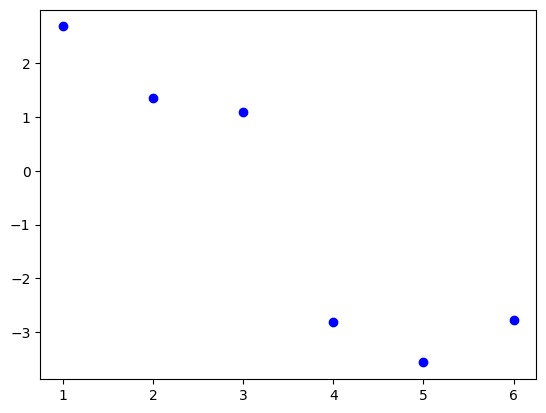

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display, Image


def run_visible(data):
    num_examples = data.shape[0]
    hidden_states = np.ones((num_examples, num_hidden + 1))
    data = np.insert(data, 0, 1, axis = 1)
    hidden_activations = np.dot(data, weights)
    hidden_probs = _logistic(hidden_activations)
    hidden_states[:,:] = hidden_probs > np.random.rand(num_examples, num_hidden + 1)
    hidden_states = hidden_states[:,1:]
    return hidden_states

def run_hidden(data):
    num_examples = data.shape[0]
    visible_states = np.ones((num_examples, num_visible + 1))
    data = np.insert(data, 0, 1, axis = 1)
    visible_activations = np.dot(data, weights.T)
    visible_probs = _logistic(visible_activations)
    visible_states[:,:] = visible_probs > np.random.rand(num_examples, num_visible + 1)
    visible_states = visible_states[:,1:]
    return visible_states

def free_run(num_samples):
    samples = np.ones((num_samples, num_visible + 1))
    samples[0,1:] = np.random.rand(num_visible)
    for i in range(1, num_samples):
        visible = samples[i-1,:]
        hidden_activations = np.dot(visible, weights)
        hidden_probs = _logistic(hidden_activations)
        hidden_states = hidden_probs > np.random.rand(num_hidden + 1)
        hidden_states[0] = 1
        visible_activations = np.dot(hidden_states, weights.T)
        visible_probs = _logistic(visible_activations)
        visible_states = visible_probs > np.random.rand(num_visible + 1)
        samples[i,:] = visible_states
    return samples[:,1:]

def _logistic(x):
    return 1.0 / (1 + np.exp(-x))


num_hidden = 2
num_visible = 6


np_rng = np.random.RandomState(1234)
print("Random \n ",np_rng)


data = np.array([[1,1,1,0,0,0],
                 [1,0,1,0,0,0],
                 [1,1,1,0,0,0],
                 [0,0,1,1,1,0],
                 [0,0,1,1,0,0],
                 [0,0,1,1,1,0]])


trec=(data).shape[0]
val1=np.sqrt(trec / (num_hidden + num_visible))
weights=np.asarray([[0.1,0.1],[0.1,0.1],[0.1,0.1],[0.1,0.1],[0.1,0.1],[0.1,0.1]])
weights = np.insert(weights,0, 0, axis = 0)
weights = np.insert(weights,0, 0, axis = 1)
max_epochs = 5000
learning_rate = 0.1
num_examples = data.shape[0]
data = np.insert(data, 0, 1, axis = 1)

for epoch in range(max_epochs):
    pos_hidden_activations = np.dot(data, weights)
    pos_hidden_probs = _logistic(pos_hidden_activations)
    pos_hidden_probs[:,0] = 1 # Fix the bias unit.
    pos_associations = np.dot(data.T, pos_hidden_probs)
    random_prob_states = np.random.rand(num_examples, num_hidden + 1)
    pos_hidden_states = pos_hidden_probs > random_prob_states
    neg_visible_activations = np.dot(pos_hidden_states, weights.T)
    neg_visible_probs = _logistic(neg_visible_activations)
    neg_visible_probs[:,0] = 1 # Fix the bias unit.
    neg_hidden_activations = np.dot(neg_visible_probs, weights)
    neg_hidden_probs = _logistic(neg_hidden_activations)
    neg_associations = np.dot(neg_visible_probs.T, neg_hidden_probs)
    delta_Associations = ((pos_associations - neg_associations) / num_examples)
    weights += learning_rate * delta_Associations
    error = np.sum((data - neg_visible_probs) ** 2)
    #print("error \n",error)

print("error \n",error)
print("weights \n",weights)
user = np.array([[0,1,1,0,0,0]])
print(run_visible(user))

import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array(range(1, 7))
ypoints = np.array(weights[1:,1])
print(np.array(weights[1:,1]))

plt.scatter(xpoints, ypoints, c ="blue")
plt.show()